<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Rabinovich%E2%80%93Fabrikant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do atrator de Rabinovich Fabrikant
gamma = 0.1
alpha = 0.14




# Funções das equações diferenciais do atrator de Lorenz

def dx_dt(x, y, z):
    return y * (z - 1 + x**2) + gamma * x

def dy_dt(x, y, z):
    return x * (3 * z + 1 - x**2) + gamma* y

def dz_dt(x, y, z):
    return -2 * z * (alpha+ x * y)

# Método de Euler para resolver as equações diferenciais
def euler_method(dx_dt, dy_dt, dz_dt, x0, y0, z0, h, num_steps):
    x_values = [x0]
    y_values = [y0]
    z_values = [z0]
    for _ in range(num_steps):
        x_new = x_values[-1] + h * dx_dt(x_values[-1], y_values[-1], z_values[-1])
        y_new = y_values[-1] + h * dy_dt(x_values[-1], y_values[-1], z_values[-1])
        z_new = z_values[-1] + h * dz_dt(x_values[-1], y_values[-1], z_values[-1])
        x_values.append(x_new)
        y_values.append(y_new)
        z_values.append(z_new)
    return x_values, y_values, z_values

# Parâmetros do método de Euler
h =0.0001  # Tamanho do passo
num_steps = 10000000  # Número de passos

# Condições iniciais
x0 = 0.1
y0 = -0.1
z0 = 0.1

# Resolvendo as equações diferenciais do atrator de Lorenz
x_values, y_values, z_values = euler_method(dx_dt, dy_dt, dz_dt, x0, y0, z0, h, num_steps)

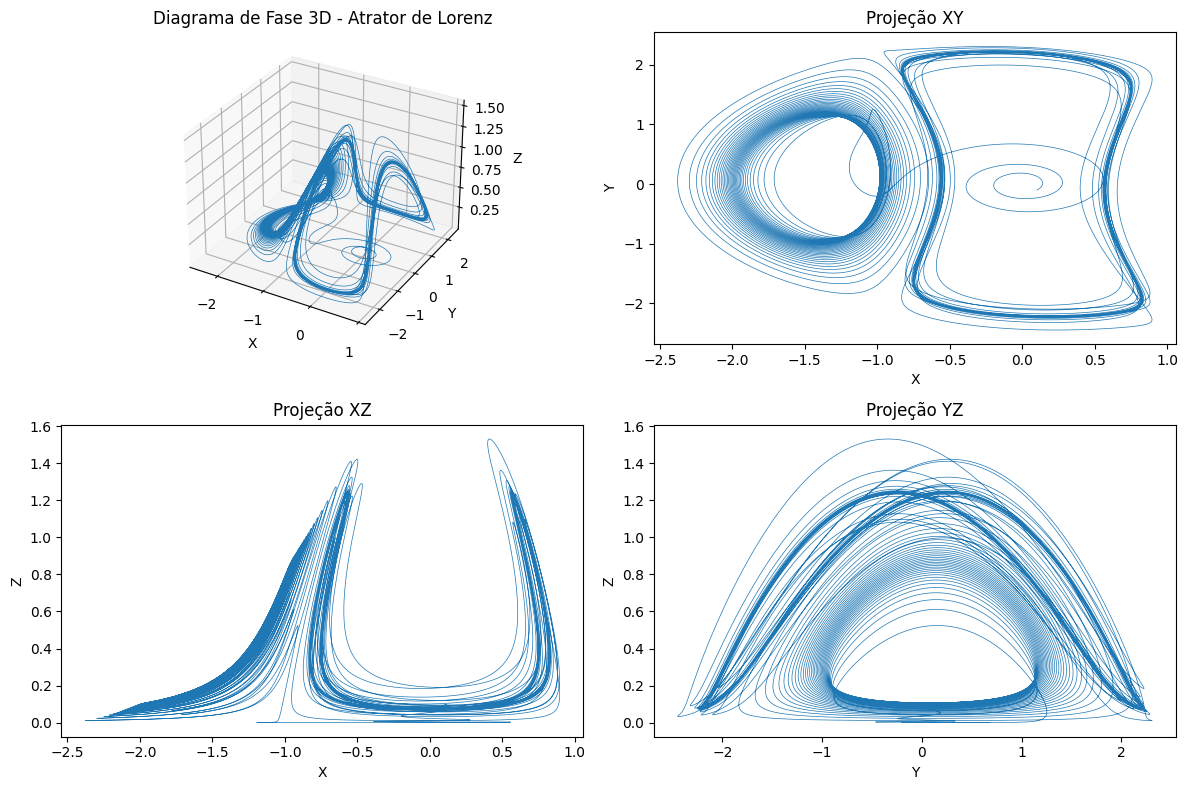

In [ ]:
# Plot dos resultados
fig = plt.figure(figsize=(12, 8))

# Diagrama de Fase 3D
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(x_values, y_values, z_values, linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Diagrama de Fase 3D - Atrator de Lorenz')

# Projeção XY
plt.subplot(2, 2, 2)
plt.plot(x_values, y_values, linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Projeção XY')

# Projeção XZ
plt.subplot(2, 2, 3)
plt.plot(x_values, z_values, linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Projeção XZ')

# Projeção YZ
plt.subplot(2, 2, 4)
plt.plot(y_values, z_values, linewidth=0.5)
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Projeção YZ')

plt.tight_layout()
plt.show()